In [4]:
import editdistance as ed
import numpy as np
import networkx as nx

In [5]:
import matplotlib.pyplot as plt

In [6]:
with open("../data/Sasha/Sasha1.fasta") as f:
    lines = [x[:31] for x in f.readlines()][1::2]

In [7]:
lines[:3]

['TGGAGCATTATGTTTTTAGGTTACGGAGCAA',
 'GGTGATAGTGGAAGTTTTACTTATACTTGGC',
 'ACAAGAGGTTTTTCAGCAATATATGTACTTC']

In [8]:
with open("../data/Sasha/Sasha1_pairs.txt") as f:
    pairs = [[y[:31] for y in x[:-2].split(' ') ] for x in f.readlines()]

In [9]:
lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])

In [10]:
from collections import Counter, OrderedDict

In [11]:
counter = Counter(lines)
ord_dict = OrderedDict()

In [12]:
u_lines = []
counts = []
for item in counter.items():
    u_lines.append(item[0])
    counts.append(item[1])
    
u_lines = np.array(u_lines)
counts = np.array(counts)

In [13]:
args_s = np.argsort(counts)[::-1]

In [14]:
for l, c in zip(u_lines[args_s], counts[args_s]):
    ord_dict[l] = c


In [15]:
sp_to_n = {}

In [16]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = -1
    for comp_item in d.items():
        dist = ed.eval(init_item[0], comp_item[0])
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item

In [17]:
od = OrderedDict({"aaa" : 10, "acb" : 3, "aac" : 1, "xyc" : 1})

In [18]:
   
def squash(od, t):
    answ = OrderedDict()
    sp_to_n = {}
    index = 0
    
    for init_item in od.items():
        #ord_dict.pop(init_item[0])

        if len(answ) == 0 :
            print("new spacer:", init_item[0], init_item[1])
            answ[init_item[0]] = init_item[1]
            sp_to_n[init_item[0]] = index
            index += 1
        else:
#             min_ed = t
#             answ_item = -1
#             for comp_item in answ.items():
#                 dist = ed.eval(init_item[0], comp_item[0])
#                 if dist < min_ed:
#                     min_ed = dist
#                     answ_item = comp_item

#             if min_ed < t:
#                 answ[answ_item[0]] += init_item[1]
#                 sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
#                 print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
#             else:
#                 sp_to_n[init_item[0]] = index
#                 index += 1
#                 answ[init_item[0]] = init_item[1]
#                 print("new spacer:", init_item[0], init_item[1])
            min_ed, answ_item = find_closest(answ, init_item, t)
            if min_ed < t:
                answ[answ_item[0]] += init_item[1]
                sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
                print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
            else:
                sp_to_n[init_item[0]] = index
                index += 1
                answ[init_item[0]] = init_item[1]
                print("new spacer:", init_item[0], init_item[1])
    return answ, sp_to_n

            

In [19]:
squash(od, 3)

new spacer: aaa 10
add: acb to aaa 13
add: aac to aaa 14
new spacer: xyc 1


(OrderedDict([('aaa', 14), ('xyc', 1)]),
 {'aaa': 0, 'aac': 0, 'acb': 0, 'xyc': 1})

In [20]:
nd, sp_to_n = squash(ord_dict, 6)

new spacer: GGTGATAGTGGAAGTTTTACTTATACTTGGC 9951
new spacer: TTCAGAATACTTAGCTCCTGCGCCTATATCG 7731
new spacer: TGGAGCATTATGTTTTTAGGTTACGGAGCAA 6849
new spacer: AAAGTTTTGCGCATTGTATGTGTGCCTAGAT 4655
new spacer: GTTTTAGAACAGAAAAAATTGTATAAATTGT 4482
new spacer: AGGTCAAGCATAGATTTTGCAACTGGAAGAT 4212
new spacer: GATTGTACTTTAGCGTCTGCACTAGCTTTGT 4027
new spacer: ACTAAACCTTTTTGTTTACTTTTATTTCTCA 2972
new spacer: CCGGATTTTTCTGCTTCGACTGTTGTTATTG 2686
new spacer: TATTTTACAGATGAACAATTACAGTTACTTC 2669
new spacer: TGTAAAAATATTGCTTAGCATATTGATATCA 2583
new spacer: AGACTCGACATAGAATCGGTTACTAAATCCG 2554
new spacer: TTGTAAAATGTAAATAGCATATTAATTTTTC 2549
new spacer: TTGGTTAACTTAAGTGCTATGAAAGGAATTA 2499
new spacer: AGTACATATAATGAGTCTTTAACATCAGTTA 2369
new spacer: CCAACCCTTCGCACGAATCCGTGCGACGAAA 2326
new spacer: ACAGCTCCCAAGACATACAACGAATCTGTAA 2325
new spacer: TCATCAATATTAATTTTGGGAATATCAACAT 2313
new spacer: ACAAGAGGTTTTTCAGCAATATATGTACTTC 2278
new spacer: AGTAATTCCATGCAATCTTTTATATTGCTTT 2270
new spacer: ACGAAATT

add: ACAAGAGGTTTTTCAGCGATATATGTACTTC to ACAAGAGGTTTTTCAGCAATATATGTACTTC 2312
add: ACGAAATTAGAGTTTGAAGTATATGACTACA to ACGAAATTAGAGTTTGAAATATATGACTACA 2282
add: AGATATACAAGGTGAAAGTGTTGAAACTTCA to AGATATACAAGGTGAAAGTGTTGAAATTTCA 1678
add: GGTGGTAGTGGAAGTTTTACTTATACTTGGC to GGTGATAGTGGAAGTTTTACTTATACTTGGC 10295
add: CCAACCCTCCGCACGAATCCGTGCGACGAAA to CCAACCCTTCGCACGAATCCGTGCGACGAAA 2338
add: TGTAAAAATATCGCTTAGCATATTGATATCA to TGTAAAAATATTGCTTAGCATATTGATATCA 2641
add: GTTTTAGAACAGAAGAAATTGTATAAATTGT to GTTTTAGAACAGAAAAAATTGTATAAATTGT 4595
add: TCCATTTGTCTAATGCTTCCAACTCTTTTTT to TCCATTTGTCTAATGCTTCTAACTCTTTTTT 1029
add: ATGTCCCCACATCAGTTTTCCTCCGCATGTA to ATGTCCCCACATCAATTTTCCTCCGCATGAA 1705
add: GATTGTACTTTAGCGTCTGCACTGGCTTTGT to GATTGTACTTTAGCGTCTGCACTAGCTTTGT 4194
add: GTTTTAGAGCAGAAAAAATTGTATAAATTGT to GTTTTAGAACAGAAAAAATTGTATAAATTGT 4607
add: TTGTAAAATGTAAATAGCATATTAATTTCTC to TTGTAAAATGTAAATAGCATATTAATTTTTC 2591
add: AGGTCAAGCATAGATTTTGCAACTGAAAGAT to AGGTCAAGCATAGATTTTGCAACTGGAAGAT 434

add: GATTGTACTATAGCGTCTGCACTAGCTTTGT to GATTGTACTTTAGCGTCTGCACTAGCTTTGT 4240
add: ATTCTTAGACGTTATAATTTGTGTTGCATTT to ATTCTTAGATGTTATAATTTGTGTTGCATTT 1311
add: AGGATAAAGAAGAGACTCACACAAGACACAG to AGGATAAAGAAAAGACTCACACAAGACACAG 544
add: TCCATTTGTCTAATGCTTCTAACTCTTTTCT to TCCATTTGTCTAATGCTTCTAACTCTTTTTT 1049
add: TTCAGTGGGAATAAGCTTTATTGTCGATGTA to TTCAGTGAGAATAAGCTTTATTGTCGATGTA 2151
add: TTGGCTAACTTAAGTGCTATGAAAGGAATTA to TTGGTTAACTTAAGTGCTATGAAAGGAATTA 2577
add: ACAAGAGGGTTTTCAGCAATATATGTACTTG to ACAAGAGGTTTTTCAGCAATATATGTACTTC 2370
add: TTCAGAATACTTGGCTCCTACGCCTATATCG to TTCAGAATACTTAGCTCCTGCGCCTATATCG 8052
add: AAGCAACTATAGTAGAAGCAAGAGCGACAAC to AAGCAACTATAGTAGAAGCAAAAGCGACAAC 1383
add: GGTGATAGTGGAAGTTTTACTTATACATGGC to GGTGATAGTGGAAGTTTTACTTATACTTGGC 10394
add: TTCAGAATACTTAGCTCCTGCGCCTGTATCG to TTCAGAATACTTAGCTCCTGCGCCTATATCG 8059
add: TTTTAAGCAGGTGATTAAATGATTAAAAAGT to TTTTAAGCAGGTGATTAAATGATTAAAAAAG 562
add: ATTAAATTGCTCAGTCTAGTACTTAAGGAAT to ATTAAATTGCTCAGTCTAGTACTTAAAGAAT 1440


add: GACTTATTTACAGCTTTATTTGCTAAATCGG to GACTTATTTACAGCTTTATTTGCTAAATCAG 1247
add: TCCATTTGTCTAATGCTTCTGACTCTTTTTT to TCCATTTGTCTAATGCTTCTAACTCTTTTTT 1069
add: ACTAATTGAGTTAAACAAATGGATATAACTA to ACTAATTGGGTTAAACAAATGGATATAACTA 1296
add: TCATCGATATTAATTTTGGGAATATCAACAT to TCATCAATATTAATTTTGGGAATATCAACAT 2417
add: TTGCTATGATTTAATTATACGACGTTTCGTC to TTGCTATGATTTAATTATACGACGTTTTGTC 483
add: TATTTTATAGATGAACAATTACAGTTACTTC to TATTTTACAGATGAACAATTACAGTTACTTC 2817
add: AGTAATTCCATGCAATCTTTTATGTTGCTTT to AGTAATTCCATGCAATCTTTTATATTGCTTT 2338
add: TCCATTTGTCTAATGCTTCTAGCTCTTTTTT to TCCATTTGTCTAATGCTTCTAACTCTTTTTT 1073
add: AAAGTTTTGCGCATTGTATGTGTGCATAGAT to AAAGTTTTGCGCATTGTATGTGTGCCTAGAT 4896
add: GTCGTAAGAAGTATCATTCTATTTTTTAATC to GTTGTAAGAAGTATCATTCTATTTTTTAATC 1142
add: ACTAATTGGGCTAAACAAATGGATATAACTA to ACTAATTGGGTTAAACAAATGGATATAACTA 1300
add: AACAAAGAACCATTTGTATCACGAAAACTAA to AACAAAGAACCATTTGAATCACGAAAACTAA 1394
add: TGCTGTGCCACAATTTGATGCTTCTACAGCT to TGCTGTGCCACAATTTGATGCTTCTATAGCT 292
a

add: ATGTCCCCACATCAATTTTCCTCCGCGTGAA to ATGTCCCCACATCAATTTTCCTCCGCATGAA 1755
add: AAGGAAGGTGGAAGTCAATATGCGTGGGTCA to AAGGAAGGTGGAAGTCAATATGCATGGGTCA 1642
add: ACGAAATTAGAGTTTGAAAGATATGACTACA to ACGAAATTAGAGTTTGAAATATATGACTACA 2366
add: TTGCTATGATTTAATTATACGACGTTTGTCT to TTGCTATGATTTAATTATACGACGTTTTGTC 493
add: ATGTCCGCACATCAATTTTCCTCCGCATGAA to ATGTCCCCACATCAATTTTCCTCCGCATGAA 1757
add: TTCAGAATACTTAGCTCCTGCGCCTATCTCG to TTCAGAATACTTAGCTCCTGCGCCTATATCG 8134
add: TATTTTACAGATGAACAATTACAGTTTCTTC to TATTTTACAGATGAACAATTACAGTTACTTC 2847
add: TTTTACTTTTCCTTCCTATGTGTCCAATTCG to TTTTACTTTTCCTTTCTATGTGTCCAATTCG 124
add: TTGCAGGTATTCCTTATAGTTTGCCATATGT to TTGCAGGTTTTCCTTATAGTTTGCCATATGT 1553
add: TTCAGTGAGAATGAGCTTTATTGTCGATGTA to TTCAGTGAGAATAAGCTTTATTGTCGATGTA 2185
add: ATGTCCCCTCATCAATTTTCCTCCGCATGAA to ATGTCCCCACATCAATTTTCCTCCGCATGAA 1759
add: GCATCAATATTAATTTTGGGAATATCAACAT to TCATCAATATTAATTTTGGGAATATCAACAT 2449
add: TCCGTTTGTCTAATGCTTCTAACTCTTTTTT to TCCATTTGTCTAATGCTTCTAACTCTTTTTT 1095
a

add: AGACTTGACATAGAATCGGTTACTAAATCCG to AGACTCGACATAGAATCGGTTACTAAATCCG 2698
new spacer: TCTAGTTTTTTCTCTTTAGAAAAAATAAAAA 2
add: GATTGTACTTTAGCATCTGCACTAGCCTTGT to GATTGTACTTTAGCGTCTGCACTAGCTTTGT 4308
add: GACTTATTTACAACTTTATTTGCTAAATCAG to GACTTATTTACAGCTTTATTTGCTAAATCAG 1263
add: TTGTGGCACATCATTGTCACTTCTTTAGAAT to TTGTGTCACATCATTGTCACTTCTTTAGAAT 1037
add: AAAGTTTTGCGCATGGTATGTGTGCCTAGAT to AAAGTTTTGCGCATTGTATGTGTGCCTAGAT 4931
add: GACTTATATATTATGAAAAAATATGGAGTCA to GAATTATATATTATGAAAAAATATGGAGTCA 1312
add: AAAGTTTTGCGCATTGTATGTGTGCCTGGAT to AAAGTTTTGCGCATTGTATGTGTGCCTAGAT 4933
add: TTTAGCAAATTTTTCGTAAGAGTCACTATTT to TTTAGCAAATTTTTCGTAAAAGTCACTATTT 160
add: TTCAGAATACTTAGCTCCTGCGCCTATATTG to TTCAGAATACTTAGCTCCTGCGCCTATATCG 8138
add: GCGATACGAGATTCGAGTCTTTTTACTGGGC to GCGATAAGAGATTCGAGTCTTTTTACTGGGC 1649
add: AGTAATTCCATGCAATCTTTTAAATTGCTTT to AGTAATTCCATGCAATCTTTTATATTGCTTT 2370
add: TGGAGCGTTATGTTTTCAGGTTACGGAGCAA to TGGAGCATTATGTTTTTAGGTTACGGAGCAA 7184
add: TGGAGCATTATGTTTTTAGGTGACGG

add: TGGAGCATTATGTTTTTAGGTACGGAGCAAC to TGGAGCATTATGTTTTTAGGTTACGGAGCAA 7204
add: TGTAAAATGTAAATAGCATATTAATTTTTCT to TTGTAAAATGTAAATAGCATATTAATTTTTC 2700
add: ACTAATTGGGTTAAACAAATGGGTATAACTA to ACTAATTGGGTTAAACAAATGGATATAACTA 1321
add: AAGCAACTATAGTAGAAACAAAAGCGACAAC to AAGCAACTATAGTAGAAGCAAAAGCGACAAC 1415
add: ACGGATTTTTCTGCTTCGACTGTTGTTATTG to CCGGATTTTTCTGCTTCGACTGTTGTTATTG 2859
add: GACCTATTTACAGCTTTATTTGCTAAATCAG to GACTTATTTACAGCTTTATTTGCTAAATCAG 1267
add: TTATTAACCTTATCAGAAACTTGACCATCCC to TTATTAACCTTATCAGAAACCTGACCATCCC 1270
add: AAGGAGGGTGGAAGTCAATATGCATGGGTCA to AAGGAAGGTGGAAGTCAATATGCATGGGTCA 1654
add: ATGTCCCCACATCAATTTTCCTCCGCATGCA to ATGTCCCCACATCAATTTTCCTCCGCATGAA 1779
add: CCGGATTTTTCTGCTTCGACCGTTGTTATTG to CCGGATTTTTCTGCTTCGACTGTTGTTATTG 2861
add: CCGACCCTTCGTACGAATCCGTGCGACGAAA to CCAACCCTTCGCACGAATCCGTGCGACGAAA 2442
add: ACTAATTGGATTAAACAAATGGATATAACTA to ACTAATTGGGTTAAACAAATGGATATAACTA 1323
add: CATTGTGTACTAAGCTTGATATAGTGCAAAA to CATTGTATACTAAGCTTGATATAGTGCAAAA 701


In [21]:
nd

OrderedDict([('GGTGATAGTGGAAGTTTTACTTATACTTGGC', 10499),
             ('TTCAGAATACTTAGCTCCTGCGCCTATATCG', 8142),
             ('TGGAGCATTATGTTTTTAGGTTACGGAGCAA', 7204),
             ('AAAGTTTTGCGCATTGTATGTGTGCCTAGAT', 4951),
             ('GTTTTAGAACAGAAAAAATTGTATAAATTGT', 4783),
             ('AGGTCAAGCATAGATTTTGCAACTGGAAGAT', 4472),
             ('GATTGTACTTTAGCGTCTGCACTAGCTTTGT', 4321),
             ('ACTAAACCTTTTTGTTTACTTTTATTTCTCA', 3191),
             ('CCGGATTTTTCTGCTTCGACTGTTGTTATTG', 2863),
             ('TATTTTACAGATGAACAATTACAGTTACTTC', 2866),
             ('TGTAAAAATATTGCTTAGCATATTGATATCA', 2748),
             ('AGACTCGACATAGAATCGGTTACTAAATCCG', 2707),
             ('TTGTAAAATGTAAATAGCATATTAATTTTTC', 2702),
             ('TTGGTTAACTTAAGTGCTATGAAAGGAATTA', 2659),
             ('AGTACATATAATGAGTCTTTAACATCAGTTA', 2501),
             ('CCAACCCTTCGCACGAATCCGTGCGACGAAA', 2446),
             ('ACAGCTCCCAAGACATACAACGAATCTGTAA', 2425),
             ('TCATCAATATTAATTTTGGGAATATCAACAT'

In [22]:
len(nd)

81

In [23]:
cl_to_n = {}
n_to_clust = {}
for i, it in enumerate(nd.items()):
    cl_to_n[it[0]] = i
    n_to_clust[i] = it[0]

In [24]:
#with open("../data/ES/ES3_R1_pairs.txt") as f:
#    pairs = [[y[:31] for y in x[:-2].split(' ')] for x in f.readlines()]

In [25]:
len(pairs)

63562

In [26]:
def process_pair(pair, cl_to_num, t = 6):
    return [cl_to_n[find_closest(cl_to_num, pair[0], t)[1]], cl_to_n[find_closest(cl_to_num, pair[1], t)[1]]]

In [27]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = -1
    for comp_item in d.items():
        dist = ed.eval(init_item, comp_item[0])
        #print(comp_item[0], init_item, dist)
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item[0]

In [28]:
pairs[18][0] in lines

True

In [29]:
process_pair(pairs[18], cl_to_n)

[2, 0]

In [30]:
pairs_n = [process_pair(p, cl_to_n) for p in pairs]

In [35]:
pairs_n[344]

[15, 10]

In [36]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

0

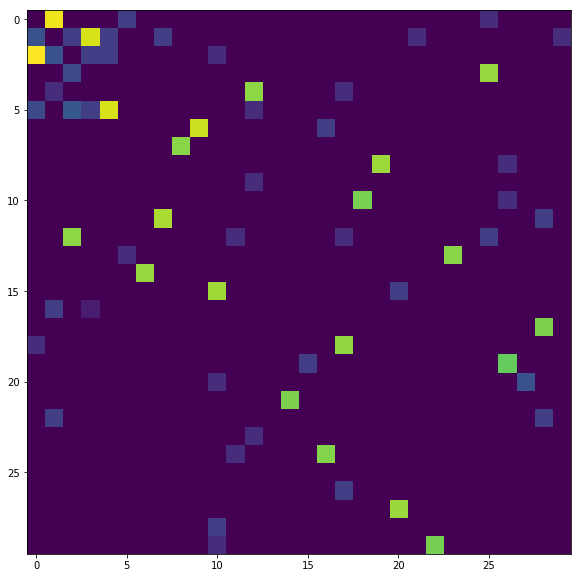

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(graph+1)[:30,:30])
plt.show()

In [34]:
graph_list = [x.tolist() for x in graph.astype(int)[:, :]]

In [ ]:
import networkx as nx

In [ ]:
def to_graph(gr, edges_num):
    G=nx.DiGraph()
    G.add_nodes_from(np.arange(gr.shape[0]))
    
    edges = []
    curr_weight = 1000
    #while curr_weight > 100:
    for i in range(edges_num):
        lin_max = np.argmax(gr)
        curr_weight = np.max(gr)
        
        x, y = lin_max // gr.shape[0], lin_max % gr.shape[0]
        gr[x, :] = 0
        #gr[:, x] = 0

        G.add_edge(x, y)
        edges.append([x, y])
    
    #arr_to_sp(sp_9)
    return edges, G

In [26]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

NameError: name 'pairs_n' is not defined

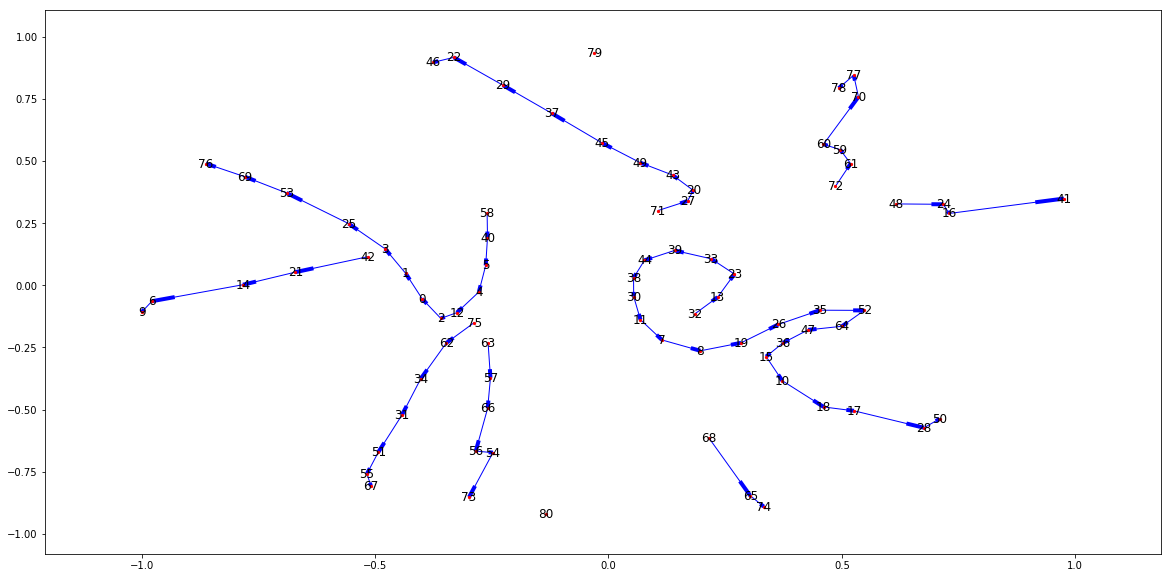

In [162]:

pairs, G = to_graph(np.copy(graph), 70)

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx(G, edge_color='b', node_size=5)
#nx.draw_networkx(G_ans, edge_color='r', node_size=1)
#nx.draw_networkx_edges(G, )
plt.show()

In [38]:
graph_norm = (graph) / (graph.sum(1) + 1).reshape(-1, 1)

# CHAIN WALKER

In [39]:
def plot_gr(gr, t, log = False, s=10):
    plt.figure(figsize=(s,s))
    if log:
        plt.imshow(np.log(gr[:t,:t] + 1))
    else:
        plt.imshow(gr[:t,:t])
    plt.xticks(np.arange(t))
    plt.yticks(np.arange(t))
    plt.show()

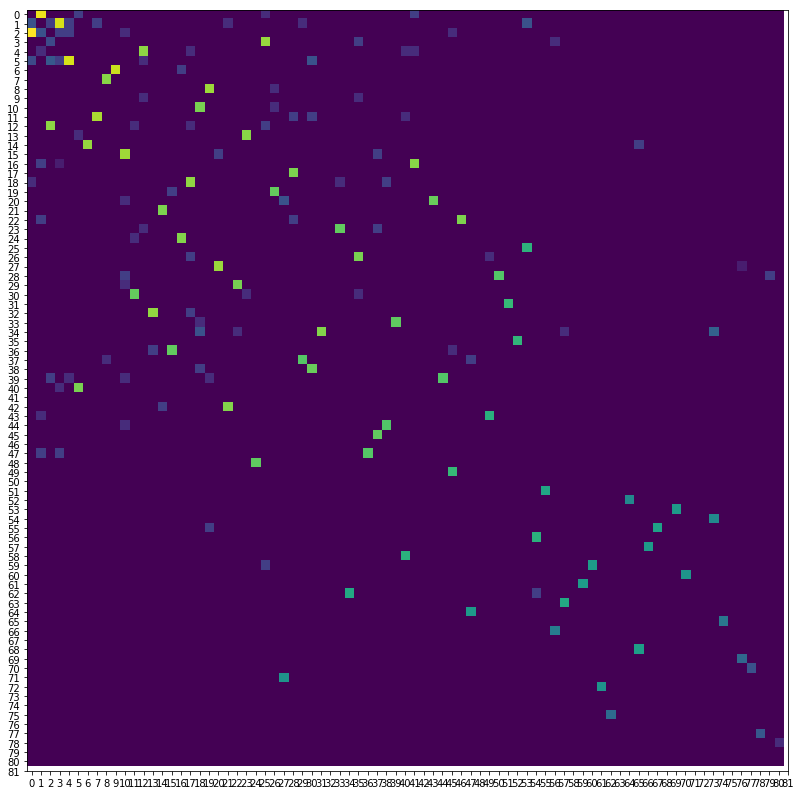

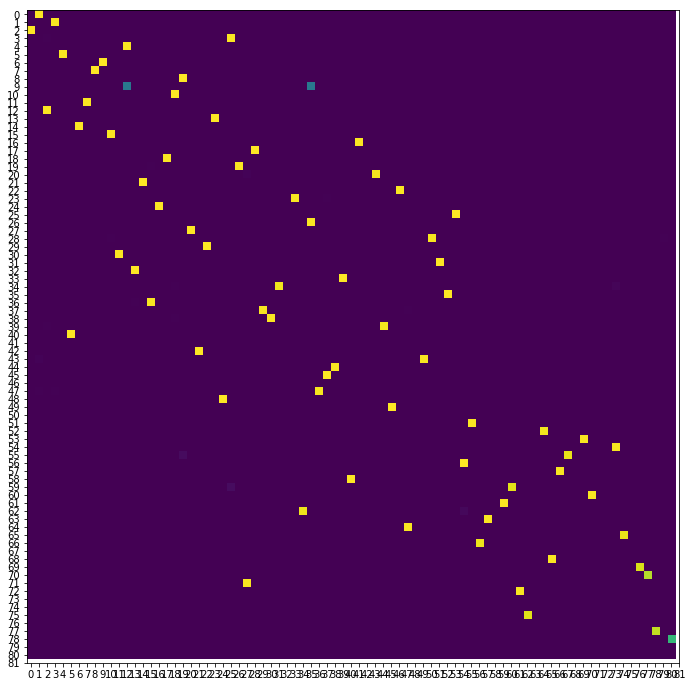

In [40]:
plot_gr(graph, 82, True, 14) 
plot_gr(graph_norm, 82, s =12)

In [41]:
gr = graph
grn = graph_norm

In [90]:
gr.shape

(81, 81)

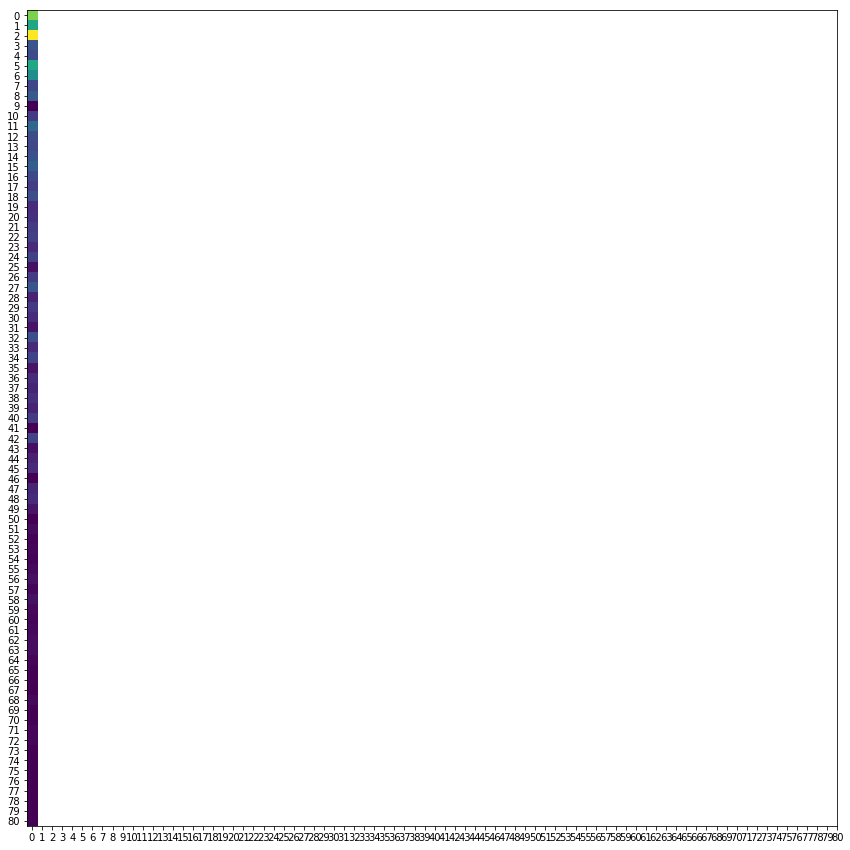

In [100]:
plot_gr(gr.sum(1).reshape(-1,1), 81, s = 15)


In [218]:
gr.sum(1).astype(int)

array([4676, 3452, 5827, 1516, 1343, 3460, 2866, 1231, 1630,    4, 1033,
       1966, 1361, 1244, 1459, 1709, 1267, 1067, 1388,  745,  817, 1038,
       1094,  721, 1156,  267, 1029, 1562,  577,  970,  741,  336, 1415,
        702, 1173,  304,  739,  600,  810,  571, 1008,    0, 1162,  244,
        546,  720,    0,  593,  693,  336,    0,  168,   56,  112,   61,
        144,  253,  110,  256,  118,   92,  116,  193,  183,  106,   30,
         38,    0,  128,   17,    8,   86,   87,    0,    0,   20,    0,
         10,    2,    0,    0])

In [265]:
gr.sum(1).astype(int)[80]

0

In [42]:
terminate_vertexes = set(np.arange(81)[gr.sum(1).astype(int) <= 5])

In [257]:
terminate_vertexes

{9, 41, 46, 50, 67, 73, 74, 76, 78, 79, 80}

In [ ]:
# Way 1 
visited = dict()

all_cass = {}
for v in range(35):
#     print(all_cass)
#     print("--")
    if v not in visited.keys():
        cassette = []
        while not v in terminate_vertexes:
            cassette.append(v)
            v = np.argmax(gr[v])
            if v in visited.keys():
                save_cassette = visited[v]
            visited[v] = save_cassette
        cassette.append(v)
        #if len(cassette) != 0 : 
        #    print(cassette)

        all_cass[save_cassette] = cassette
        
        cassette = []
        cassette_num += 1
        

In [43]:
# Way 1 
visited = dict()

all_cass = {}
cassette_num = 0 
for v in range(81):
#     print(all_cass)
#     print("--")
    if v not in visited.keys():
        cassette = []
        save_cassette = cassette_num
        while not v in terminate_vertexes:
            cassette.append(v)
            v = np.argmax(gr[v])
            if v in visited.keys():
                save_cassette = visited[v]
            visited[v] = save_cassette
        cassette.append(v)
        if len(cassette) != 0 : 
            print(cassette)

        all_cass[save_cassette] = cassette
        
        cassette = []
        cassette_num += 1
        

[0, 1, 3, 25, 53, 69, 76]
[2, 0, 1, 3, 25, 53, 69, 76]
[4, 12, 2, 0, 1, 3, 25, 53, 69, 76]
[5, 4, 12, 2, 0, 1, 3, 25, 53, 69, 76]
[6, 9]
[7, 8, 19, 26, 35, 52, 64, 47, 36, 15, 10, 18, 17, 28, 50]
[11, 7, 8, 19, 26, 35, 52, 64, 47, 36, 15, 10, 18, 17, 28, 50]
[13, 23, 33, 39, 44, 38, 30, 11, 7, 8, 19, 26, 35, 52, 64, 47, 36, 15, 10, 18, 17, 28, 50]
[14, 6, 9]
[16, 41]
[20, 43, 49, 45, 37, 29, 22, 46]
[21, 14, 6, 9]
[24, 16, 41]
[27, 20, 43, 49, 45, 37, 29, 22, 46]
[31, 51, 55, 67]
[32, 13, 23, 33, 39, 44, 38, 30, 11, 7, 8, 19, 26, 35, 52, 64, 47, 36, 15, 10, 18, 17, 28, 50]
[34, 31, 51, 55, 67]
[40, 5, 4, 12, 2, 0, 1, 3, 25, 53, 69, 76]
[42, 21, 14, 6, 9]
[48, 24, 16, 41]
[54, 73]
[56, 54, 73]
[57, 66, 56, 54, 73]
[58, 40, 5, 4, 12, 2, 0, 1, 3, 25, 53, 69, 76]
[59, 60, 70, 77, 78]
[61, 59, 60, 70, 77, 78]
[62, 34, 31, 51, 55, 67]
[63, 57, 66, 56, 54, 73]
[65, 74]
[68, 65, 74]
[71, 27, 20, 43, 49, 45, 37, 29, 22, 46]
[72, 61, 59, 60, 70, 77, 78]
[75, 62, 34, 31, 51, 55, 67]
[79]
[80]


In [46]:
import pickle

In [47]:
pickle.dump([np.array(x) for x in all_cass.values()], open("../data/dicts/Sasha_chains_old_22", 'wb'))

In [48]:
all_cass

{0: [58, 40, 5, 4, 12, 2, 0, 1, 3, 25, 53, 69, 76],
 4: [42, 21, 14, 6, 9],
 5: [32,
  13,
  23,
  33,
  39,
  44,
  38,
  30,
  11,
  7,
  8,
  19,
  26,
  35,
  52,
  64,
  47,
  36,
  15,
  10,
  18,
  17,
  28,
  50],
 9: [48, 24, 16, 41],
 10: [71, 27, 20, 43, 49, 45, 37, 29, 22, 46],
 14: [75, 62, 34, 31, 51, 55, 67],
 20: [63, 57, 66, 56, 54, 73],
 24: [72, 61, 59, 60, 70, 77, 78],
 28: [68, 65, 74],
 33: [79],
 34: [80]}

In [104]:
for ch in all_cass.values():
    for sp in ch:
        print(n_to_clust[sp])
    print("-------------")

TTAATTTATCTATAATTTAAAACGGTGAATT
TAAAGAGGGGTACTTCGTACTTTTACCACTC
AGGTCAAGCATAGATTTTGCAACTGGAAGAT
GTTTTAGAACAGAAAAAATTGTATAAATTGT
TTGTAAAATGTAAATAGCATATTAATTTTTC
TGGAGCATTATGTTTTTAGGTTACGGAGCAA
GGTGATAGTGGAAGTTTTACTTATACTTGGC
TTCAGAATACTTAGCTCCTGCGCCTATATCG
AAAGTTTTGCGCATTGTATGTGTGCCTAGAT
ATGTCCCCACATCAATTTTCCTCCGCATGAA
TTTAGAAACAACAGAATAAACATAATATATA
TTTTACTTTTCCTTTCTATGTGTCCAATTCG
CTTATACTTAGTTAGAACTATATATCGACAC
-------------
GTTGTAAGAAGTATCATTCTATTTTTTAATC
TTCAGTGAGAATAAGCTTTATTGTCGATGTA
AGTACATATAATGAGTCTTTAACATCAGTTA
GATTGTACTTTAGCGTCTGCACTAGCTTTGT
TATTTTACAGATGAACAATTACAGTTACTTC
-------------
AAGCAACTATAGTAGAAGCAAAAGCGACAAC
TTGGTTAACTTAAGTGCTATGAAAGGAATTA
TTAAAGGTGCAAGTCTTAATACTTGTTACAT
AACAAAGAACCATTTGAATCACGAAAACTAA
TTATTAACCTTATCAGAAACCTGACCATCCC
TCCATTTGTCTAATGCTTCTAACTCTTTTTT
TCCAAAATGGGCTTGGAGTTAAGAGTTGTAT
TAATTACACACTCCCTTTTAACGAACATATT
AGACTCGACATAGAATCGGTTACTAAATCCG
ACTAAACCTTTTTGTTTACTTTTATTTCTCA
CCGGATTTTTCTGCTTCGACTGTTGTTATTG
AGTAATTCCATGCAATCTTTTATATTGCTTT
AGATATACAAGG

In [246]:
find_closest(sp_to_n, "AAAATTGTGTTTTCTCTTTCATACACCCACTT", 100)

(12, 'CAACATTAGTAGTTGTCTTTATACACACAGC')

In [247]:
cl_to_n["TCTAGTTTTTTCTCTTTAGAAAAAATAAAAA"]

80

In [266]:
cl_to_n["TGTTATAATATTAAAACACAACTAAAATATA"]

78

In [267]:
gr.sum(1)[78]

2.0

In [268]:
find_closest(dict(zip(lines, range(len(lines)))), "CCATCTTTTGTTGTTTTACATAAATTTATATT", 100)

(12, 'ACAATATTATTGTTCATTTCATTTAATAATT')

In [138]:
with open("../data/clostr_answer.txt") as f:
    answ = [[y[:32] for y in x[3:].split("\t") if len(y) > 2] for x in f.read().splitlines()]

In [166]:
5 3 7 4 1 0 0 6 

5

In [263]:
for a, b in zip_longest(all_cass_l[7],answ[6][::-1]) :
    if not a is None:
        print(n_to_clust[a], b)
    else:
        print("______________emp______________", b)

TAGGATTGGTGTGTTACGACCACACAACGCT TAGGATTGGTGTGTTACGACCACACAACGCTG
AGTGAATTTGGCGAACTCGATATAGAGAAAA AGTGAATTTGGCGAACTCGATATAGAGAAAAA
GAAGTTTTTAATGTTGTCGCGACTCTTGCTG GAAGTTTTTAATGTTGTCGCGACTCTTGCTGT
CTGCTTTGGCTTTTGGTCGTATAATGCTCCT CTGCTTTGGCTTTTGGTCGTATAATGCTCCTT
TTAAATCTAGCATCAGTCATTAGTATAAAAT TTAAATCTAGCATCAGTCATTAGTATAAAATT
AATAAAAAAGGTATAGTTTTCTTCTTAGTTA AATAAAAAAGGTATAGTTTTCTTCTTAGTTAC
TGTTATAATATTAAAACACAACTAAAATATA TGTTATAATATTAAAACACAACTAAAATATAC
______________emp______________ TCTAGTTTTTTCTCTTTAGAAAAAATAAAAAC
______________emp______________ AAAATTGTGTTTTCTCTTTCATACACCCACTT


In [262]:
all_cass_l = [x for x in all_cass.values()]

In [193]:
n_to_clust["emp"] = "______________emp______________"

In [146]:
from itertools import zip_longest

In [149]:
all_cass_l[0]

[58, 40, 5, 4, 12, 2, 0, 1, 3, 25, 53, 69, 76]

In [151]:
n_to_clust[58]

'TTAATTTATCTATAATTTAAAACGGTGAATT'

In [152]:
all_cass_l[0]

[58, 40, 5, 4, 12, 2, 0, 1, 3, 25, 53, 69, 76]